<a href="https://colab.research.google.com/github/Ezraliano/Bank_Transaction/blob/main/Copy_of_%5BClustering%5D_Submission_Akhir_BMLP_Your_Name_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [548]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [549]:
#Type your code here
bank_df = pd.read_csv('https://raw.githubusercontent.com/Ezraliano/Bank_Transaction/refs/heads/main/bank_transactions_data.csv')
bank_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [550]:
#Type your code here
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [551]:
bank_df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [552]:
#Mencari duplicate data
bank_df.duplicated().sum()

0

In [553]:
numeric_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation','Location','DeviceID']

In [554]:

# Statistik deskriptif untuk variabel numerik
numeric_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
print("Statistik Deskriptif:")
print(bank_df[numeric_cols].describe())

Statistik Deskriptif:
       TransactionAmount  AccountBalance  CustomerAge  TransactionDuration  \
count        2512.000000     2512.000000  2512.000000          2512.000000   
mean          297.593778     5114.302966    44.673965           119.643312   
std           291.946243     3900.942499    17.792198            69.963757   
min             0.260000      101.250000    18.000000            10.000000   
25%            81.885000     1504.370000    27.000000            63.000000   
50%           211.140000     4735.510000    45.000000           112.500000   
75%           414.527500     7678.820000    59.000000           161.000000   
max          1919.110000    14977.990000    80.000000           300.000000   

       LoginAttempts  
count    2512.000000  
mean        1.124602  
std         0.602662  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         5.000000  


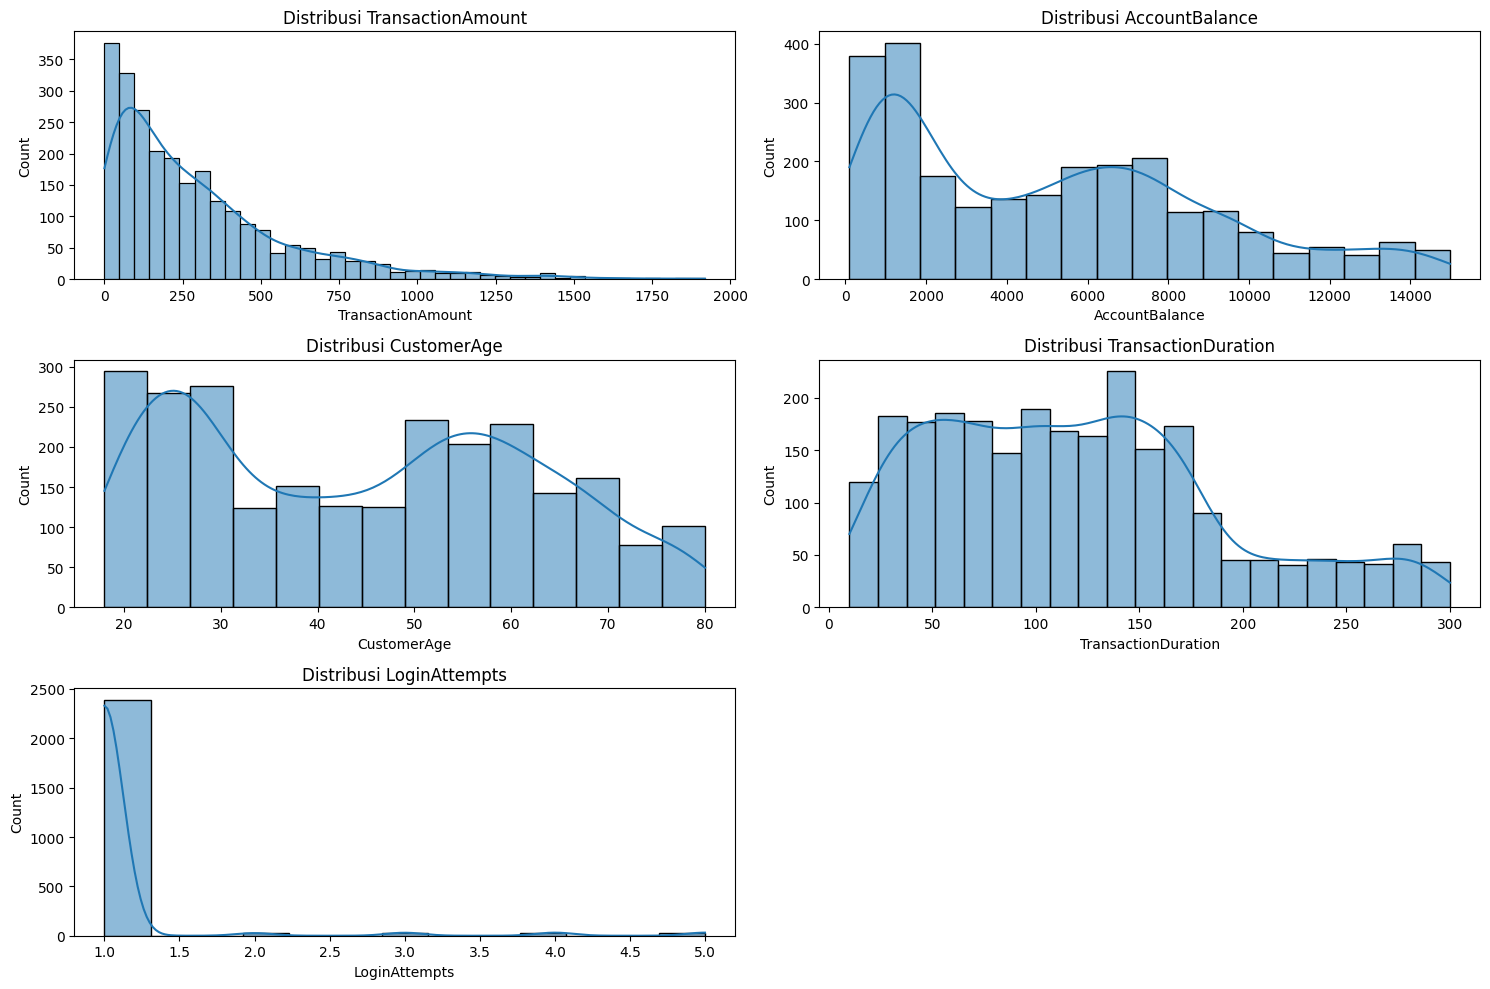

In [555]:
#Analisis Distribusi dan korelasi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=bank_df, x=col, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

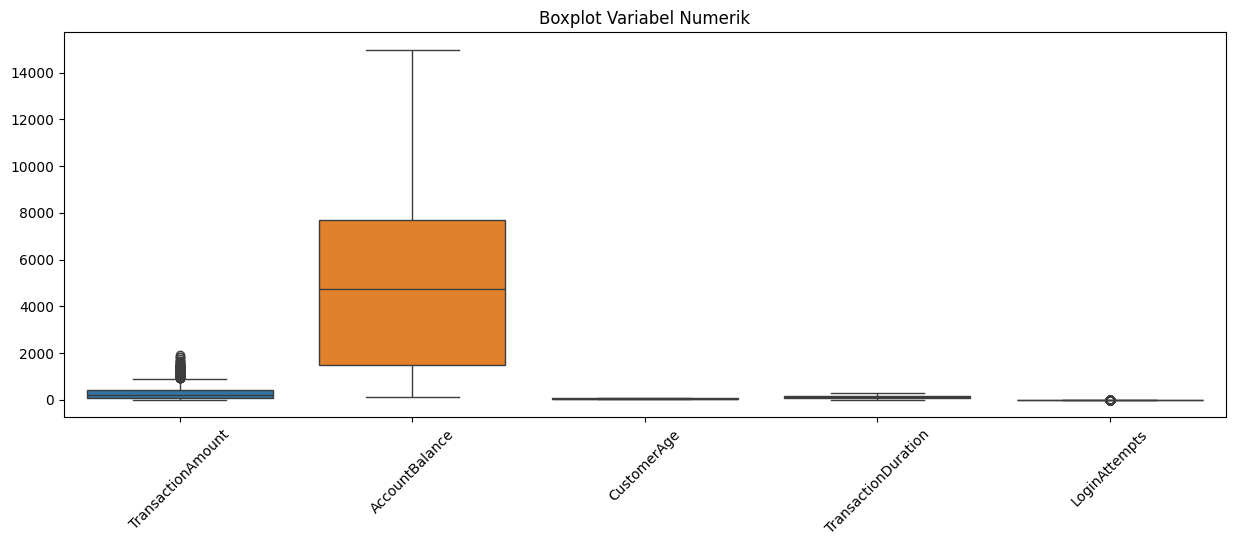

In [556]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 5))
sns.boxplot(data=bank_df[numeric_cols])
plt.title('Boxplot Variabel Numerik')
plt.xticks(rotation=45)
plt.show()

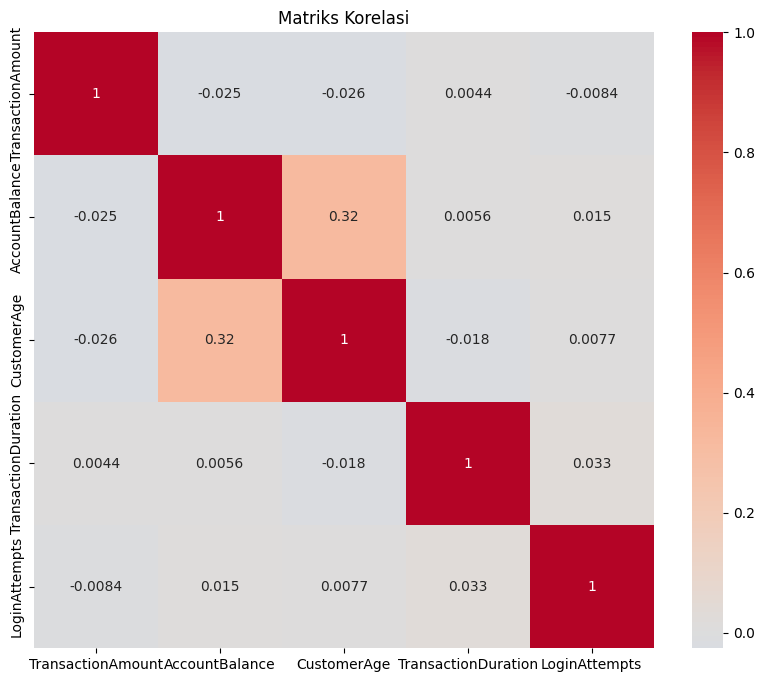

In [557]:
# Matriks korelasi
correlation_matrix = bank_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [558]:
#Type your code here
# Normalisasi atau Standarisasi Fitur
# Standarisasi fitur numerik
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(bank_df[numeric_cols])
numeric_df = pd.DataFrame(numeric_scaled, columns=numeric_cols, index=bank_df.index)
print("Data setelah Standarisasi:")
print(bank_df[numeric_cols].head())

Data setelah Standarisasi:
   TransactionAmount  AccountBalance  CustomerAge  TransactionDuration  \
0              14.09         5112.21           70                   81   
1             376.24        13758.91           68                  141   
2             126.29         1122.35           19                   56   
3             184.50         8569.06           26                   25   
4              13.45         7429.40           26                  198   

   LoginAttempts  
0              1  
1              1  
2              1  
3              1  
4              1  


In [559]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

In [560]:
# Mendeteksi outliers untuk setiap kolom numerik
outliers_dict = {}
for col in numeric_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(bank_df, col)
    outliers_dict[col] = {
        'outliers': outliers,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'count': len(outliers)
    }
    print(f"\nOutliers di {col}:")
    print(f"Jumlah outliers: {len(outliers)}")
    print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")
    print(f"Contoh outliers: {outliers.head().tolist()}")


Outliers di TransactionAmount:
Jumlah outliers: 113
Batas bawah: -417.08, Batas atas: 913.49
Contoh outliers: [1212.51, 922.55, 1340.19, 1045.22, 1036.66]

Outliers di AccountBalance:
Jumlah outliers: 0
Batas bawah: -7757.30, Batas atas: 16940.49
Contoh outliers: []

Outliers di CustomerAge:
Jumlah outliers: 0
Batas bawah: -21.00, Batas atas: 107.00
Contoh outliers: []

Outliers di TransactionDuration:
Jumlah outliers: 0
Batas bawah: -84.00, Batas atas: 308.00
Contoh outliers: []

Outliers di LoginAttempts:
Jumlah outliers: 122
Batas bawah: 1.00, Batas atas: 1.00
Contoh outliers: [3, 5, 3, 2, 2]


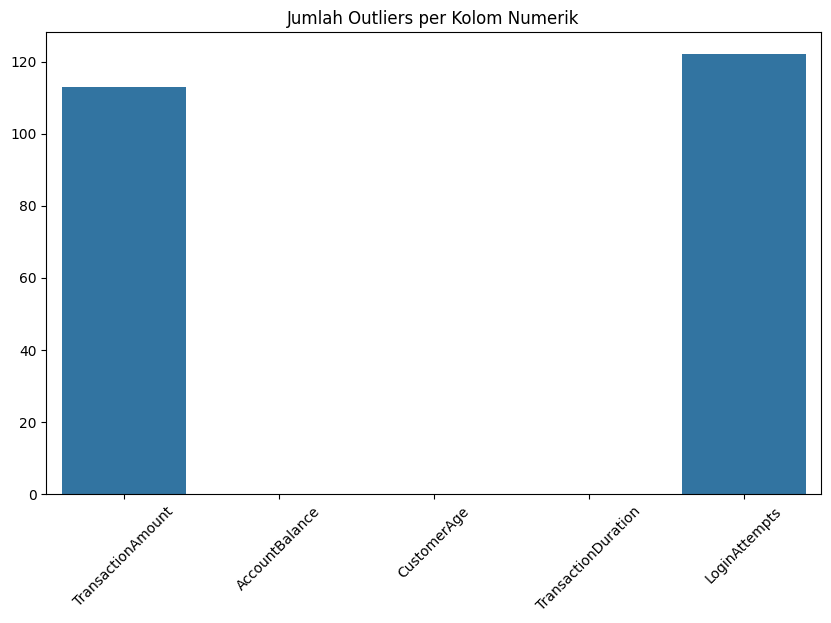

In [561]:
# Visualisasi jumlah outliers
outlier_counts = {col: info['count'] for col, info in outliers_dict.items()}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
plt.title('Jumlah Outliers per Kolom Numerik')
plt.xticks(rotation=45)
plt.show()

In [562]:
# Fungsi untuk melakukan Winsorizing pada kolom tertentu
def winsorize_column(df, column, lower_bound, upper_bound):
    df_winsorized = df.copy()
    df_winsorized[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df_winsorized[column] = np.where(df[column] > upper_bound, upper_bound, df_winsorized[column])
    return df_winsorized

In [563]:
# Terapkan Winsorizing pada semua kolom numerik
bank_df_cleaned = bank_df.copy()
for col in numeric_cols:
    lower_bound = outliers_dict[col]['lower_bound']
    upper_bound = outliers_dict[col]['upper_bound']
    bank_df_cleaned = winsorize_column(bank_df_cleaned, col, lower_bound, upper_bound)

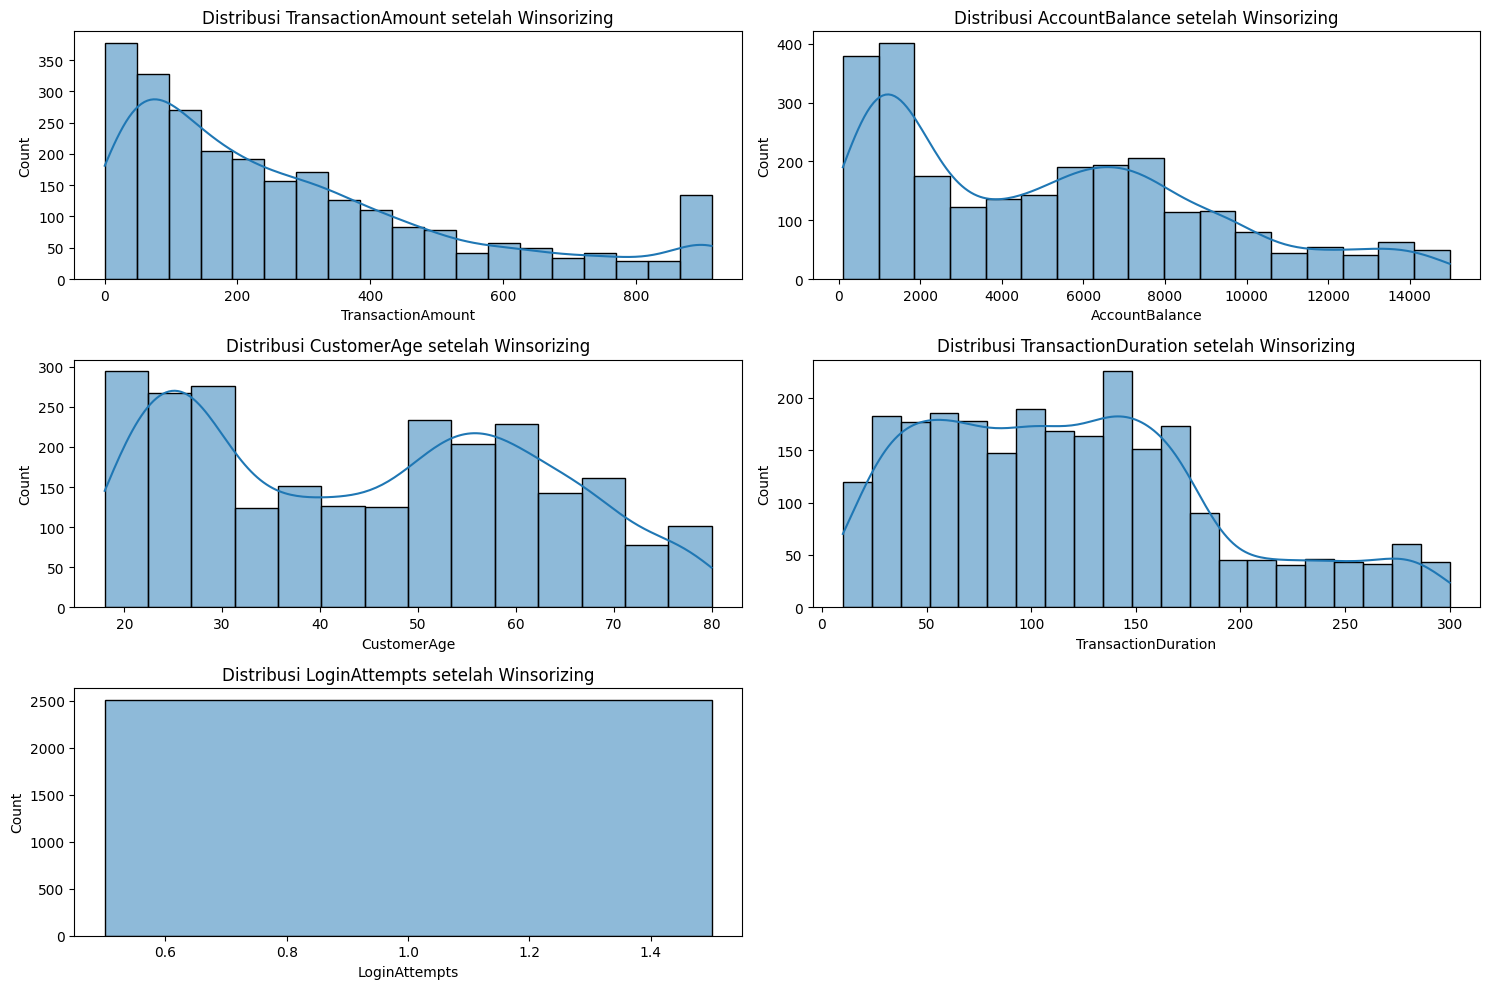

In [564]:
# Verifikasi distribusi setelah Winsorizing
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=bank_df_cleaned, x=col, kde=True)
    plt.title(f'Distribusi {col} setelah Winsorizing')
plt.tight_layout()
plt.show()

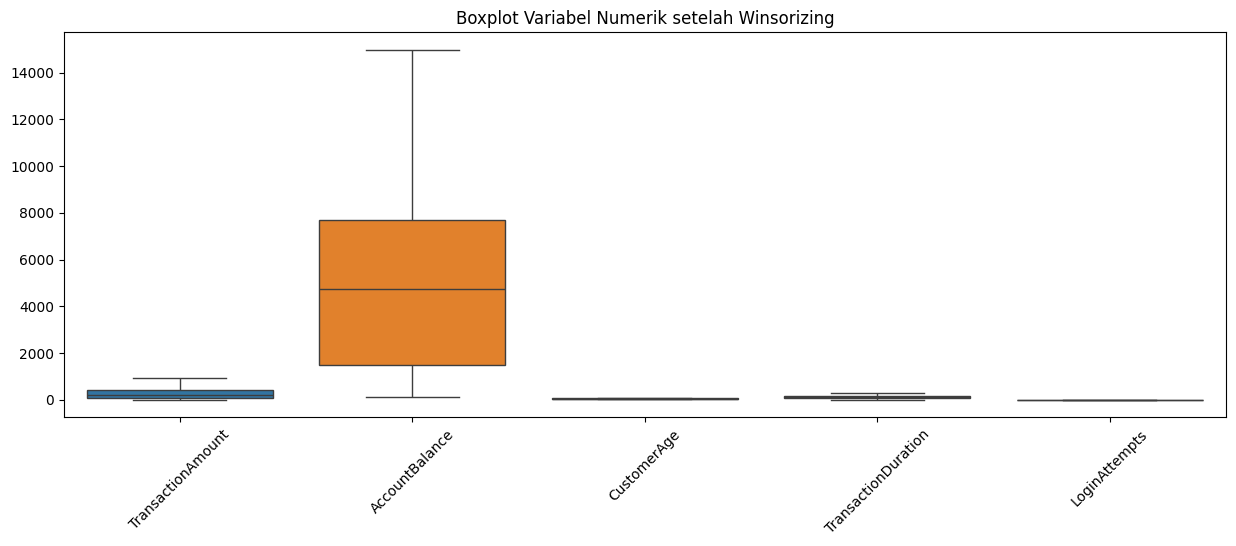

In [565]:
# Boxplot setelah Winsorizing
plt.figure(figsize=(15, 5))
sns.boxplot(data=bank_df_cleaned[numeric_cols])
plt.title('Boxplot Variabel Numerik setelah Winsorizing')
plt.xticks(rotation=45)
plt.show()

In [566]:
# Statistik deskriptif setelah Winsorizing
print("\nStatistik Deskriptif setelah Winsorizing:")
print(bank_df_cleaned[numeric_cols].describe())


Statistik Deskriptif setelah Winsorizing:
       TransactionAmount  AccountBalance  CustomerAge  TransactionDuration  \
count        2512.000000     2512.000000  2512.000000          2512.000000   
mean          284.847250     5114.302966    44.673965           119.643312   
std           252.067285     3900.942499    17.792198            69.963757   
min             0.260000      101.250000    18.000000            10.000000   
25%            81.885000     1504.370000    27.000000            63.000000   
50%           211.140000     4735.510000    45.000000           112.500000   
75%           414.527500     7678.820000    59.000000           161.000000   
max           913.491250    14977.990000    80.000000           300.000000   

       LoginAttempts  
count         2512.0  
mean             1.0  
std              0.0  
min              1.0  
25%              1.0  
50%              1.0  
75%              1.0  
max              1.0  


Encoding Data Categorikal

In [567]:
for col in categorical_cols:
    bank_df_cleaned[col] = bank_df_cleaned[col].astype(str)

In [568]:
# 1. Label Encoding untuk TransactionType (hanya 2 kategori: Debit, Credit)
label_encoder = LabelEncoder()
bank_df_cleaned['TransactionType_encoded'] = label_encoder.fit_transform(bank_df_cleaned['TransactionType'])

In [569]:
# 2. One-Hot Encoding untuk Channel dan CustomerOccupation
# Channel memiliki sedikit kategori (ATM, Online, Branch)
# CustomerOccupation juga relatif sedikit (Doctor, Student, Engineer, Retired)
bank_df_encoded = pd.get_dummies(bank_df_cleaned, columns=['Channel', 'CustomerOccupation'], prefix=['Channel', 'Occupation'], drop_first=True, dtype=int)

In [570]:
# 3. Frequency Encoding untuk Location dan DeviceID (karena jumlah kategori banyak)
# Frequency Encoding untuk Location
location_freq = bank_df_encoded['Location'].value_counts() / len(bank_df_encoded)
bank_df_encoded['Location_encoded'] = bank_df_encoded['Location'].map(location_freq)

In [571]:
# Frequency Encoding untuk DeviceID
device_freq = bank_df_encoded['DeviceID'].value_counts() / len(bank_df_encoded)
bank_df_encoded['DeviceID_encoded'] = bank_df_encoded['DeviceID'].map(device_freq)

In [572]:
# Hapus kolom kategorikal asli yang sudah diencode (opsional)
columns_to_drop = ['TransactionType', 'Location', 'DeviceID']
bank_df_encoded = bank_df_encoded.drop(columns=columns_to_drop)

In [573]:
# Tampilkan hasil encoding
print("Data setelah Encoding:")
print(bank_df_encoded.head())

Data setelah Encoding:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

       IP Address MerchantID  CustomerAge  TransactionDuration  LoginAttempts  \
0  162.198.218.92       M015         70.0                 81.0            1.0   
1     13.149.61.4       M052         68.0                141.0            1.0   
2  215.97.143.157       M009         19.0                 56.0            1.0   
3  200.13.225.150       M002         26.0                 25.0            1.0   
4    65.164.3.100       M091         26.0                198.0            1.0   

   AccountBalance PreviousTransactionDate  TransactionType_encoded  \
0    

In [574]:
# Verifikasi kolom yang tersedia setelah encoding
print("\nKolom setelah Encoding:")
print(bank_df_encoded.columns.tolist())


Kolom setelah Encoding:
['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'IP Address', 'MerchantID', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'TransactionType_encoded', 'Channel_Branch', 'Channel_Online', 'Occupation_Engineer', 'Occupation_Retired', 'Occupation_Student', 'Location_encoded', 'DeviceID_encoded']


In [575]:
# Statistik deskriptif untuk kolom yang diencode
encoded_cols = ['TransactionType_encoded', 'Location_encoded', 'DeviceID_encoded'] + \
               [col for col in bank_df_encoded.columns if 'Channel_' in col or 'Occupation_' in col]
print("\nStatistik Deskriptif Kolom yang Dienkode:")
print(bank_df_encoded[encoded_cols].describe())


Statistik Deskriptif Kolom yang Dienkode:
       TransactionType_encoded  Location_encoded  DeviceID_encoded  \
count              2512.000000       2512.000000       2512.000000   
mean                  0.773885          0.023560          0.001818   
std                   0.418398          0.002541          0.000730   
min                   0.000000          0.016322          0.000398   
25%                   1.000000          0.021895          0.001194   
50%                   1.000000          0.023885          0.001592   
75%                   1.000000          0.025080          0.002389   
max                   1.000000          0.027866          0.003583   

       Channel_Branch  Channel_Online  Occupation_Engineer  \
count     2512.000000     2512.000000          2512.000000   
mean         0.345541        0.322850             0.248806   
std          0.475639        0.467659             0.432407   
min          0.000000        0.000000             0.000000   
25%          0.0

Binning Data

In [576]:
# Asumsikan bank_df_encoded adalah dataset setelah encoding
numeric_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

In [577]:
# Fungsi untuk visualisasi distribusi setelah binning
def plot_binned_distribution(df, column, binned_column):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=binned_column)
    plt.title(f'Distribusi {column} setelah Binning')
    plt.xticks(rotation=45)
    plt.show()


Binning Equal-width untuk TransactionAmount:
TransactionAmount_binned_width
TransactionAmount_Bin_1    1142
TransactionAmount_Bin_2     639
TransactionAmount_Bin_3     335
TransactionAmount_Bin_4     167
TransactionAmount_Bin_5     229
Name: count, dtype: int64


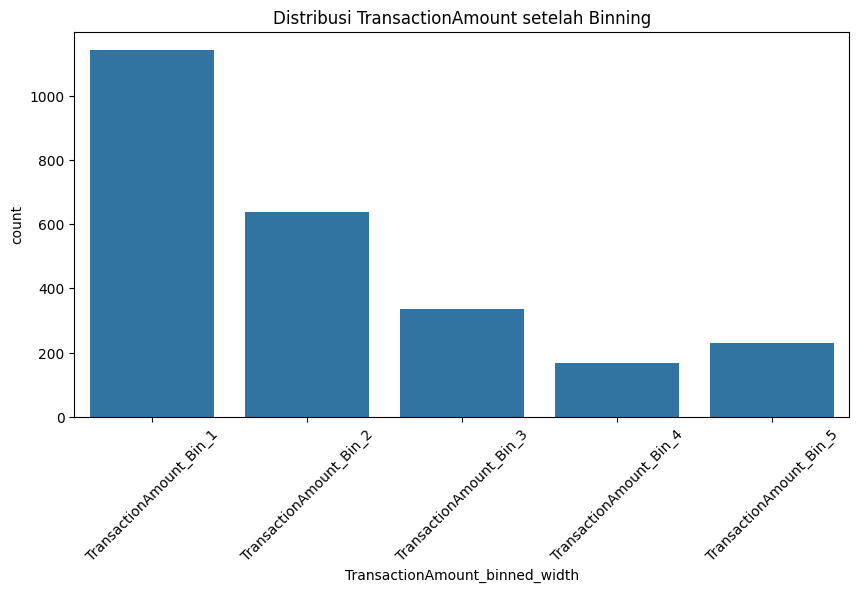


Binning Equal-width untuk AccountBalance:
AccountBalance_binned_width
AccountBalance_Bin_1    1016
AccountBalance_Bin_2     491
AccountBalance_Bin_3     579
AccountBalance_Bin_4     251
AccountBalance_Bin_5     175
Name: count, dtype: int64


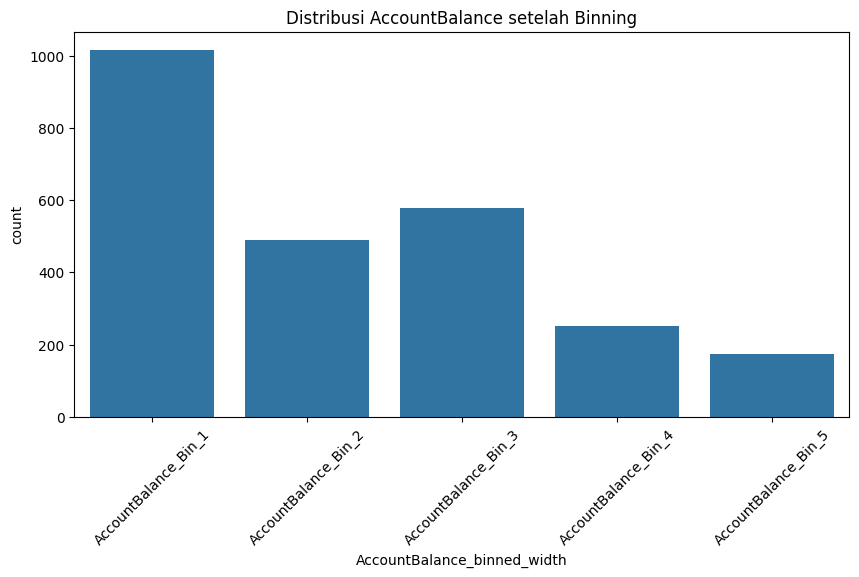


Binning Equal-width untuk CustomerAge:
CustomerAge_binned_width
CustomerAge_Bin_1    797
CustomerAge_Bin_2    384
CustomerAge_Bin_3    515
CustomerAge_Bin_4    518
CustomerAge_Bin_5    298
Name: count, dtype: int64


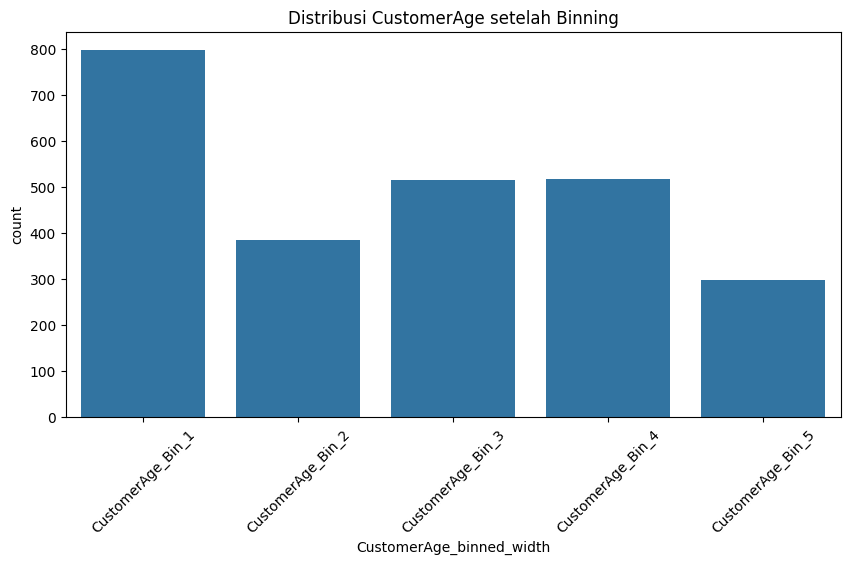


Binning Equal-width untuk TransactionDuration:
TransactionDuration_binned_width
TransactionDuration_Bin_1    708
TransactionDuration_Bin_2    707
TransactionDuration_Bin_3    716
TransactionDuration_Bin_4    184
TransactionDuration_Bin_5    197
Name: count, dtype: int64


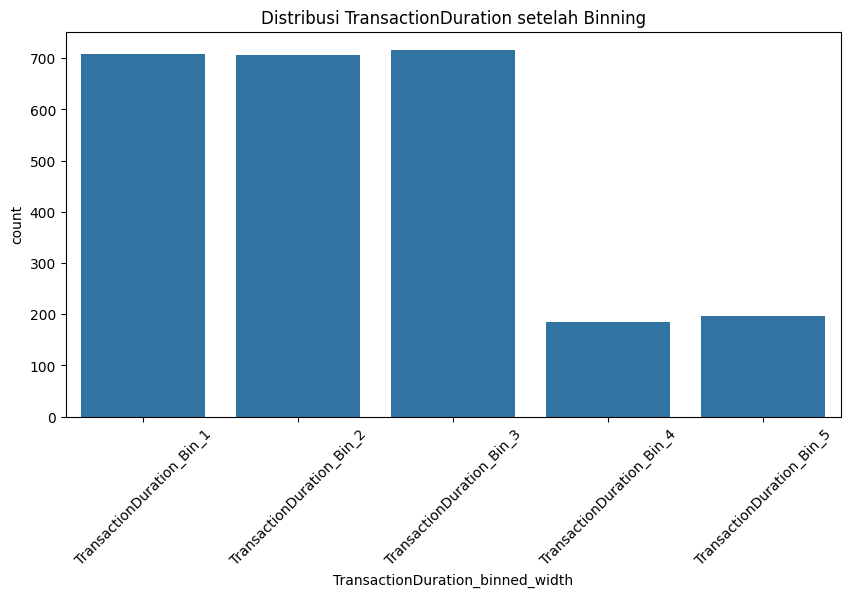


Binning Equal-width untuk LoginAttempts:
LoginAttempts_binned_width
LoginAttempts_Bin_1       0
LoginAttempts_Bin_2       0
LoginAttempts_Bin_3    2512
LoginAttempts_Bin_4       0
LoginAttempts_Bin_5       0
Name: count, dtype: int64


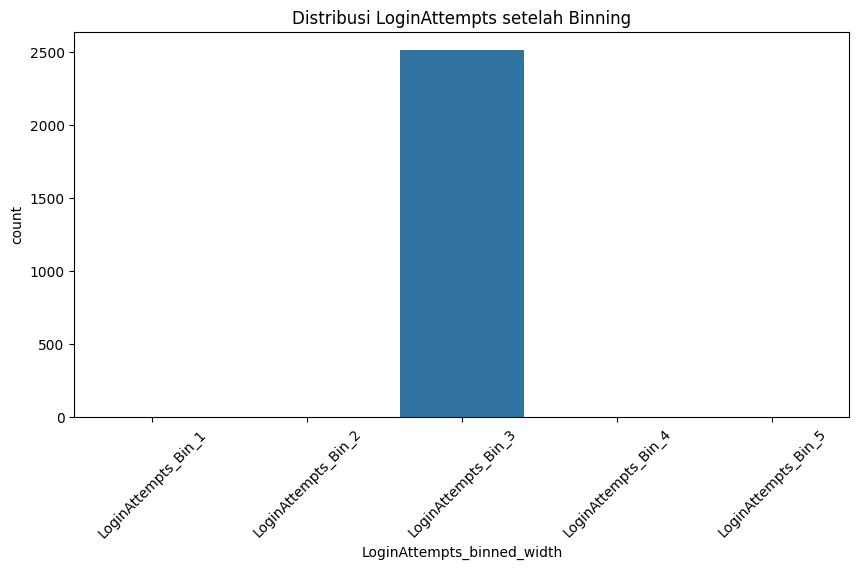

In [578]:
# 1. Equal-width Binning
# Tentukan jumlah bin (misalnya, 5 bin untuk setiap kolom)
n_bins = 5

# Dictionary untuk menyimpan hasil binning
binned_cols = {}

for col in numeric_cols:
    # Equal-width binning dengan pd.cut
    bins = pd.cut(bank_df_encoded[col], bins=n_bins, labels=[f'{col}_Bin_{i+1}' for i in range(n_bins)], include_lowest=True)
    bank_df_encoded[f'{col}_binned_width'] = bins
    binned_cols[f'{col}_binned_width'] = bins
    print(f"\nBinning Equal-width untuk {col}:")
    print(bank_df_encoded[f'{col}_binned_width'].value_counts().sort_index())
    plot_binned_distribution(bank_df_encoded, col, f'{col}_binned_width')

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [579]:
#Type your code here
# Pilih fitur yang lebih fokus
selected_features = ['TransactionAmount', 'AccountBalance', 'CustomerAge']  # Kurangi fitur encoded untuk uji coba
X = bank_df_encoded[selected_features].dropna()

In [580]:

# Transformasi log untuk fitur skewed
X['TransactionAmount'] = np.log1p(X['TransactionAmount'])
X['AccountBalance'] = np.log1p(X['AccountBalance'])

In [581]:
# 1. Standarisasi Fitur (penting untuk K-Means)
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [582]:
K_range = range(2, 11)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [583]:
#Type your code here
# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Uji 2 hingga 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X,kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K-Means, k={k}: Silhouette Score = {score:.4f}")

K-Means, k=2: Silhouette Score = 0.6532
K-Means, k=3: Silhouette Score = 0.5837
K-Means, k=4: Silhouette Score = 0.5507
K-Means, k=5: Silhouette Score = 0.4840
K-Means, k=6: Silhouette Score = 0.4775
K-Means, k=7: Silhouette Score = 0.4659
K-Means, k=8: Silhouette Score = 0.4591
K-Means, k=9: Silhouette Score = 0.4471
K-Means, k=10: Silhouette Score = 0.4365


In [584]:
# Tampilkan Silhouette Score dalam bentuk tabel
# Tabel Silhouette Score K-Means
silhouette_df = pd.DataFrame({'Jumlah Cluster (k)': list(K_range), 'Silhouette Score': silhouette_scores})
print("\nTabel Silhouette Score K-Means:")
print(silhouette_df)


Tabel Silhouette Score K-Means:
   Jumlah Cluster (k)  Silhouette Score
0                   2          0.653248
1                   3          0.583689
2                   4          0.550707
3                   5          0.483972
4                   6          0.477521
5                   7          0.465888
6                   8          0.459145
7                   9          0.447062
8                  10          0.436497


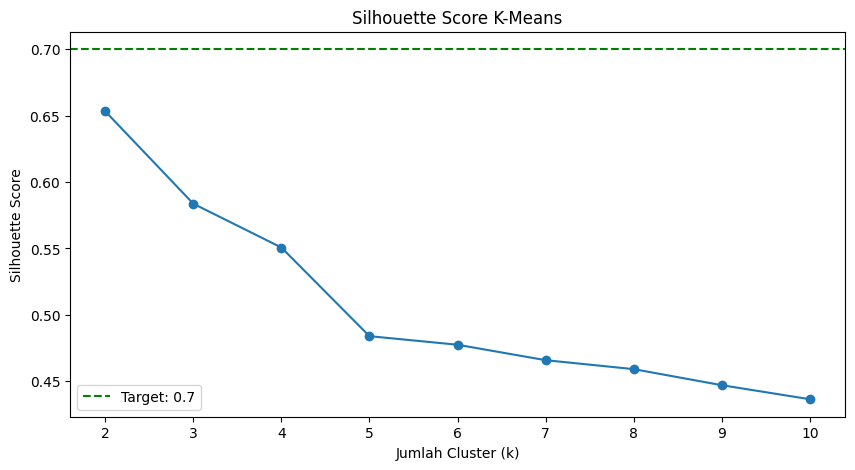

In [585]:
# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score K-Means')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.axhline(y=0.7, color='g', linestyle='--', label='Target: 0.7')
plt.legend()
plt.show()

In [586]:
# Pilih jumlah cluster optimal berdasarkan Elbow dan Silhouette (misalnya, k=3)
optimal_k = 2  # Ganti berdasarkan hasil Elbow dan Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
bank_df_encoded['Cluster'] = clusters

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [587]:
# 1. Transformasi log untuk fitur skewed
X['TransactionAmount'] = np.log1p(X['TransactionAmount'])
X['AccountBalance'] = np.log1p(X['AccountBalance'])

In [588]:
# 2. Standarisasi awal untuk analisis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [589]:
# 3. Gunakan PCA untuk memahami kontribusi fitur
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

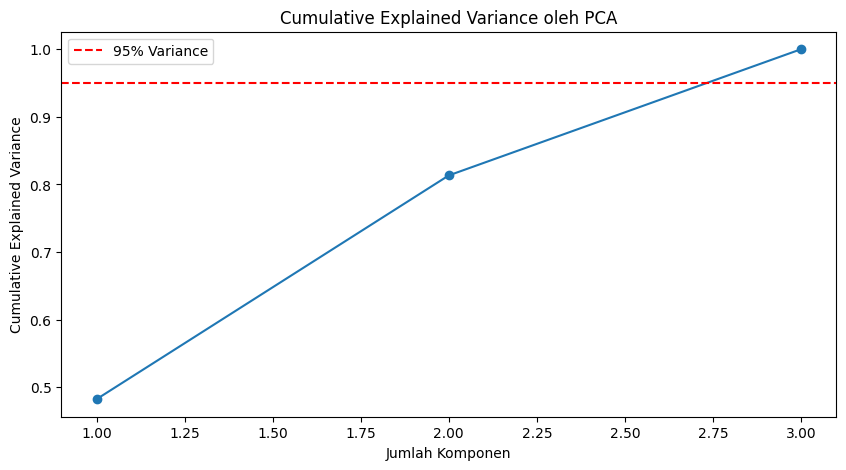

In [590]:
# Plot cumulative explained variance untuk memilih jumlah komponen
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance oleh PCA')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

In [591]:
# Pilih jumlah komponen yang menjelaskan 95% variansi
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Jumlah komponen PCA untuk 95% variansi: {n_components}")

Jumlah komponen PCA untuk 95% variansi: 3


In [592]:
# Terapkan PCA dengan jumlah komponen terpilih
pca_selected = PCA(n_components=n_components)
X_pca_scaled = pca_selected.fit_transform(X)
print(f"Total Explained Variance dengan {n_components} komponen: {sum(pca_selected.explained_variance_ratio_):.2f}")

Total Explained Variance dengan 3 komponen: 1.00


In [593]:
# Clustering dengan PCA
inertia_pca = []
silhouette_scores_pca = []

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(X_pca_scaled)
    inertia_pca.append(kmeans_pca.inertia_)
    score_pca = silhouette_score(X_pca_scaled, kmeans_pca.labels_)
    silhouette_scores_pca.append(score_pca)
    print(f"PCA Features, k={k}: Silhouette Score = {score_pca:.4f}, Inertia = {kmeans_pca.inertia_:.2f}")

PCA Features, k=2: Silhouette Score = 0.6659, Inertia = 175614.11
PCA Features, k=3: Silhouette Score = 0.6088, Inertia = 85017.04
PCA Features, k=4: Silhouette Score = 0.5912, Inertia = 48011.34
PCA Features, k=5: Silhouette Score = 0.5825, Inertia = 34044.27
PCA Features, k=6: Silhouette Score = 0.5391, Inertia = 23387.32
PCA Features, k=7: Silhouette Score = 0.5500, Inertia = 16465.23
PCA Features, k=8: Silhouette Score = 0.5551, Inertia = 11940.85
PCA Features, k=9: Silhouette Score = 0.5366, Inertia = 10500.29
PCA Features, k=10: Silhouette Score = 0.5353, Inertia = 8108.10


In [594]:
# Tabel evaluasi untuk PCA features
eval_df_pca = pd.DataFrame({
    'Jumlah Cluster (k)': list(K_range),
    'Silhouette Score': silhouette_scores_pca,
    'Inertia': inertia_pca
})
print("\nTabel Evaluasi Clustering (PCA Features):")
print(eval_df_pca)


Tabel Evaluasi Clustering (PCA Features):
   Jumlah Cluster (k)  Silhouette Score        Inertia
0                   2          0.665885  175614.113664
1                   3          0.608760   85017.044775
2                   4          0.591197   48011.344488
3                   5          0.582472   34044.274597
4                   6          0.539086   23387.319488
5                   7          0.550013   16465.231395
6                   8          0.555104   11940.852905
7                   9          0.536632   10500.294565
8                  10          0.535277    8108.099305


In [595]:
# Pilih k optimal untuk PCA features
optimal_k_pca = eval_df_pca['Jumlah Cluster (k)'][eval_df_pca['Silhouette Score'].idxmax()]
print(f"\nOptimal k (PCA Features) berdasarkan Silhouette Score tertinggi: k={optimal_k_pca}")

# Terapkan K-Means dengan k optimal untuk PCA features
kmeans_pca_optimal = KMeans(n_clusters=optimal_k_pca, random_state=42)
clusters_pca = kmeans_pca_optimal.fit_predict(X_pca_scaled)
bank_df_encoded['Cluster_PCA'] = clusters_pca


Optimal k (PCA Features) berdasarkan Silhouette Score tertinggi: k=2


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [596]:
# Visualisasi Clustering (PCA 2D untuk kedua pendekatan)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)
explained_variance_2d = pca_2d.explained_variance_ratio_

Text(0, 0.5, 'PC2 (0.0%)')

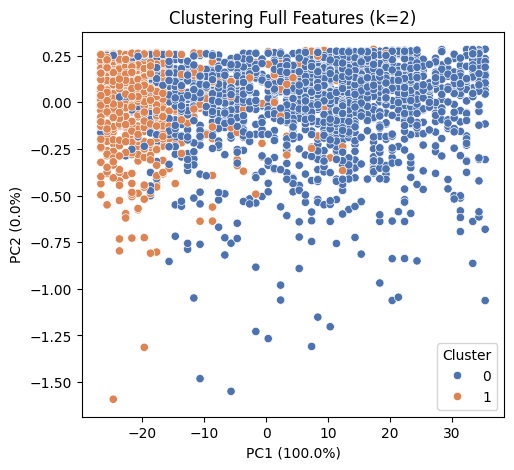

In [597]:
# Visualisasi Full Features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=bank_df_encoded['Cluster'], palette='deep')
plt.title(f'Clustering Full Features (k={optimal_k})')
plt.xlabel(f'PC1 ({explained_variance_2d[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_variance_2d[1]*100:.1f}%)')

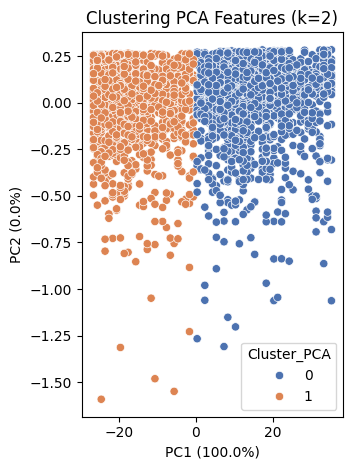

In [598]:
# Visualisasi PCA Features
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=bank_df_encoded['Cluster_PCA'], palette='deep')
plt.title(f'Clustering PCA Features (k={optimal_k_pca})')
plt.xlabel(f'PC1 ({explained_variance_2d[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_variance_2d[1]*100:.1f}%)')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [599]:
# Type your code here
# Inverse transform untuk fitur yang di-log (kembalikan ke skala asli)
X['TransactionAmount'] = np.expm1(X['TransactionAmount'])
X['AccountBalance'] = np.expm1(X['AccountBalance'])
X_pca['TransactionAmount'] = np.expm1(X_pca['TransactionAmount'])
X_pca['AccountBalance'] = np.expm1(X_pca['AccountBalance'])

KeyError: "['TransactionDuration', 'LoginAttempts'] not in index"

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.